# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Reiyan Indra
- **Email:** m010d4ky3226@bangkit.academy
- **ID Dicoding:** muhammad_reiyan_indra_m010d4ky3226_U7mI

## Menentukan Pertanyaan Bisnis

- Question 1: Which products are sold the most and the least?
- Question 2: How is the sales performance in the past months throughout the years?
- Question 3: How much money do they spent from these past in months from these past years?
- Question 4: How satisfied are customers with the service of this E-commerce platform?
- Question 5: How is the quality of the shipping service speed in our e-commerce?
- Question 6: How would you describe the demographic characteristics of our customers, and is there any variation in purchasing preferences among them?


## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import plotly.express as px
import urllib
import matplotlib.image as mpimg

from matplotlib.ticker import FuncFormatter
from tabulate import tabulate
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

Mengumpulkan dan membuka semua data yang diperlukan

**Customers_df** provides information about the customer and its location. It uses to identify unique customers in the orders dataset and to find the orders delivery locations (ID, Unique ID, ZIP Code, City Location, State)

In [3]:
customers_df = pd.read_csv("/content/drive/MyDrive/E-commerce dataset/E-Commerce Public Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Geolocation_df** provides zip codes, lat/lng coordinates. It used as plotting maps and find distances between customers and sellers

In [4]:
geolocation_df = pd.read_csv("/content/drive/MyDrive/E-commerce dataset/E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Items_df** includes data about the items purchased within each other (order_id, items, product_id, seller_id, shipping_date, price, freight_value)

In [5]:
items_df = pd.read_csv("/content/drive/MyDrive/E-commerce dataset/E-Commerce Public Dataset/order_items_dataset.csv")
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Payments_df** includes data about the orders payments methods

In [6]:
payments_df = pd.read_csv("/content/drive/MyDrive/E-commerce dataset/E-Commerce Public Dataset/order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**reviews_df** provides data about the reviews made by the customers.

In [7]:
reviews_df = pd.read_csv("/content/drive/MyDrive/E-commerce dataset/E-Commerce Public Dataset/order_reviews_dataset.csv")
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Orders_df** provides all orders from customers

In [8]:
orders_df = pd.read_csv("/content/drive/MyDrive/E-commerce dataset/E-Commerce Public Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Products_df** defines data about the products sold

In [9]:
products_df = pd.read_csv("/content/drive/MyDrive/E-commerce dataset/E-Commerce Public Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Sellers_df** includes data about the information of sellers that fulfilled orders made

In [10]:
sellers_df = pd.read_csv("/content/drive/MyDrive/E-commerce dataset/E-Commerce Public Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Translate_df** translates the product category name to english

In [11]:
translate_df = pd.read_csv("/content/drive/MyDrive/E-commerce dataset/E-Commerce Public Dataset/product_category_name_translation.csv")
translate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

Assessing data **Customers_df**

In [12]:
print("Assessing data about the information of customer and its location:\n")
print("\n", customers_df.info()) #Data Information
print("\nMissing Values:\n\n", customers_df.isna().sum()) #Missing values
print("\nData Accuracy:\n\n", customers_df.describe()) #Data Accuracy
print("\nNumbers of Duplication:", customers_df.duplicated().sum()) #Finding Duplicated Data

Assessing data about the information of customer and its location:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None

Missing Values:

 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Data Accuracy:

        customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.0000

Assessing data **geolocation_df**

In [13]:
print("Assessing data about the information of zip codes and its coordinates:\n")
print("\n", geolocation_df.info())
print("\nMissing Values:\n\n", geolocation_df.isna().sum())
print("\nData Accuracy:\n\n", geolocation_df.describe())
print("\nNumbers of Duplication:", geolocation_df.duplicated().sum())

Assessing data about the information of zip codes and its coordinates:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

 None

Missing Values:

 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Data Accuracy:

        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.0

Assessing data **items_df**

In [14]:
print("Assessing data about the information of purchased items:\n")
print("\n", items_df.info())
print("\nMissing Values:\n\n", items_df.isna().sum())
print("\nData Accuracy:\n\n", items_df.describe())
print("\nNumbers of Duplication:", items_df.duplicated().sum())

Assessing data about the information of purchased items:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

 None

Missing Values:

 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Data Accuracy:

        order_item_id          price  freight_value
count  112650.000000  112650

Assessing data **payments_df**

In [15]:
print("Assessing data about the information of payments methods:\n")
print("\n", payments_df.info())
print("\nMissing Values:\n\n", payments_df.isna().sum())
print("\nData Accuracy:\n\n", payments_df.describe())
print("\nNumbers of Duplication:", payments_df.duplicated().sum())

Assessing data about the information of payments methods:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

 None

Missing Values:

 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Data Accuracy:

        payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584    

Assessing data **reviews_df**

In [16]:
print("Assessing data about the information of reviewed items:\n")
print("\n", reviews_df.info())
print("\nMissing Values:\n\n", reviews_df.isna().sum())
print("\nData Accuracy:\n\n", reviews_df.describe())
print("\nNumbers of Duplication:", reviews_df.duplicated().sum())

Assessing data about the information of reviewed items:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

 None

Missing Values:

 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Data Accuracy:

        review_score


Assessing data **orders_df**

In [17]:
print("Assessing data about the information of ordered items:\n")
print("\n", orders_df.info())
print("\nMissing Values:\n\n", orders_df.isna().sum())
print("\nData Accuracy:\n\n", orders_df.describe())
print("\nNumbers of Duplication:", orders_df.duplicated().sum())

Assessing data about the information of ordered items:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None

Missing Values:

 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at           

Assessing data **products_df**

In [18]:
print("Assessing data about the information of products:\n")
print("\n", products_df.info())
print("\nMissing Values:\n\n", products_df.isna().sum())
print("\nData Accuracy:\n\n", products_df.describe())
print("\nNumbers of Duplication:", products_df.duplicated().sum())

Assessing data about the information of products:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

 None

Missing Values:

 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610


Assessing data **sellers_df**

In [19]:
print("Assessing data about the information of sellers:\n")
print("\n", sellers_df.info())
print("\nMissing Values:\n\n", sellers_df.isna().sum())
print("\nData Accuracy:\n\n", sellers_df.describe())
print("\nNumbers of Duplication:", sellers_df.duplicated().sum())

Assessing data about the information of sellers:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

 None

Missing Values:

 seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Data Accuracy:

        seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000

Numbers of Duplication: 0


Assessing data **translate_df**

In [20]:
print("Assessing data about the information of translated items:\n")
print("\n", translate_df.info())
print("\nMissing Values:\n\n", translate_df.isna().sum())
print("\nData Accuracy:\n\n", translate_df.describe())
print("\nNumbers of Duplication:", translate_df.duplicated().sum())

Assessing data about the information of translated items:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

 None

Missing Values:

 product_category_name            0
product_category_name_english    0
dtype: int64

Data Accuracy:

        product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1

Numbers of Duplication: 0


In [21]:
#Summary
print("Summary of data assessing:\n")
df = pd.DataFrame({
    "Data Types": ['-', '-', 'the data type\nneeded converted to datetime', '-', 'the data type\nneeded converted to datetime', 'the data type\nneeded converted to datetime', '-', '-', '-'],
    "Missing Values": ['-', '-', '-', '-', '58247-87656\nnull order\nreviews', "160-2965\nnull values", '2-610 null products', '-', '-'],
    "Duplicated Data": ['-', "261831 duplicated\ndata", '-', '-', '-', '-', '-', '-', '-'],
    "Inaccurate Value": ['-', '-', '-', '-', '-', '-', '-', '-', '-']
}, index=['customers_df', 'geolocation_df', 'items_df', 'payments_df', 'reviews_df', 'orders_df', 'products_df', 'sellers_df', 'translate_df'])

tabulated_df = tabulate(df, headers='keys', tablefmt='fancy_grid')

print(tabulated_df)


Summary of data assessing:

╒════════════════╤══════════════════════════════╤═════════════════════╤═══════════════════╤════════════════════╕
│                │ Data Types                   │ Missing Values      │ Duplicated Data   │ Inaccurate Value   │
╞════════════════╪══════════════════════════════╪═════════════════════╪═══════════════════╪════════════════════╡
│ customers_df   │ -                            │ -                   │ -                 │ -                  │
├────────────────┼──────────────────────────────┼─────────────────────┼───────────────────┼────────────────────┤
│ geolocation_df │ -                            │ -                   │ 261831 duplicated │ -                  │
│                │                              │                     │ data              │                    │
├────────────────┼──────────────────────────────┼─────────────────────┼───────────────────┼────────────────────┤
│ items_df       │ the data type                │ -                 

### Cleaning Data

Removing duplicated data in **geolocation_df**




In [22]:
geolocation_df.drop_duplicates(inplace=True)

In [23]:
print("Numbers of duplication: ", geolocation_df.duplicated().sum())

Numbers of duplication:  0


Removing missing values



*   **reviews_df**




In [24]:
reviews_df[reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [25]:
reviews_df.review_comment_message.value_counts()

Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                                                   

In [26]:
reviews_df.fillna(value="Muito bom", inplace=True)
reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64



*   **orders_df**



In [27]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [28]:
orders_df.order_approved_at.value_counts()

2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: order_approved_at, Length: 90733, dtype: int64

In [29]:
orders_df.fillna(value = "2018-02-27 04:31:10", inplace = True)
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

*   **products_df**

In [30]:
products_df[products_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [31]:
products_df.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [32]:
products_df.fillna(value="cama_mesa_banho", inplace=True)
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

 Changing Datatypes

In this way, we would like to change the datatypes which has 'int' then convert to datetime version



*  **items_df**




In [33]:
datetime_items = ["shipping_limit_date"]
for column in datetime_items:
  items_df[column] = pd.to_datetime(items_df[column])

In [34]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB




*   **reviews_df**




In [35]:
datetime_reviews = ["review_creation_date",	"review_answer_timestamp"]
for column in datetime_reviews:
  reviews_df[column] = pd.to_datetime(reviews_df[column])


In [36]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB




*   **orders_df**




In [37]:
datetime_orders = ["order_purchase_timestamp",	"order_approved_at",	"order_delivered_carrier_date", "order_delivered_customer_date",	"order_estimated_delivery_date"]
for column in datetime_orders:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [38]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

### Explore customers_df

In [39]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
44523,ea881d44e7e735dd3b154baba6917f3b,5a86385578ed60106d47b031a96b5f62,89252,jaragua do sul,SC
24867,fb4b4cb8bda9db9b27e86ac7865d4e7e,4809ad05ee38cba6a7d06d6df9fc4b42,31640,belo horizonte,MG
21482,055d109c6027a0552d11c3b1dc8d7986,6abc999251612920bec93b3be616fa1d,4455,sao paulo,SP
17981,668602ff7a4ac16b00c73785fda2025d,a3a988b211e387fba3be6fdd9b3b23be,18680,lencois paulista,SP
30032,f301846b62fbf2b848f21c09f45aa67e,eff16b37717d38f06980c961dd4ea994,83540,rio branco do sul,PR


In [40]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [41]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [42]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore payments_df

In [43]:
payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
30646,03720fdc92032ee4abd471d172006ab0,1,credit_card,1,143.49
6918,66fcdbc46a553ec1e80fc940b8f1bc15,1,credit_card,5,156.51
55260,b8db7d2782799267ee683bb2afa7f26f,1,credit_card,2,171.81
92233,995daf9c525344acfdbc27f4da55f205,1,credit_card,1,60.05
83527,4a5cf649e3eb500fc079aace5f03583e,1,credit_card,3,166.68


In [44]:
payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [45]:
payments_df.groupby(by="payment_value").order_id.nunique().sort_values(ascending=False)

payment_value
50.00       293
77.57       250
100.00      249
35.00       165
73.34       160
           ... 
222.07        1
222.09        1
222.11        1
222.15        1
13664.08      1
Name: order_id, Length: 29077, dtype: int64

In [46]:
payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### Explore reviews_df

In [47]:
reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
83442,d1e912b41af2db628c756a6365dad36f,c1d47bf45869556f656d75e071338018,2,Muito bom,Demora muito,2018-04-06,2018-04-06 10:47:48
86926,395a328431134f3e8f327219027cbf77,6b0b2d1c9273be37dfc235652a4a3d32,4,Muito bom,Muito bom,2017-06-04,2017-06-06 23:08:14
2286,965ffc0dc74a14a4a646efa734b3d60f,7a48f02683e86599fc3570c293fe4ca8,5,Muito bom,Muito bom,2017-11-02,2017-11-07 23:34:10
4094,6b4c07741e82770c2f33ec6e115116e4,8a15d9098e2b9a4a791e07691801bd9f,3,Muito bom,"Esperava uma melhor fixação da grade, de resto...",2017-02-09,2017-02-10 02:45:32
8244,3f39f218cbb056b5dfc5b50498fb2c86,85c0ddad95967f361fd9cd9e3d1886b1,5,Muito bom,Muito bom,2018-07-07,2018-07-08 02:13:34


In [48]:
reviews_df.describe(include="all")

<ipython-input-48-b32f5e178f2e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  reviews_df.describe(include="all")
<ipython-input-48-b32f5e178f2e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  reviews_df.describe(include="all")


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Muito bom,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87903,58477,463,4
first,NaN,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


In [49]:
reviews_df.groupby(by="review_score").order_id.nunique().sort_values(ascending=False).reset_index()

,review_score,order_id
0,5,57076
1,4,19098
2,1,11393
3,3,8160
4,2,3148


In [50]:
reviews_df.groupby(by="review_comment_message").order_id.nunique().sort_values(ascending=False).reset_index()

,review_comment_message,order_id
0,Muito bom,58172
1,Bom,189
2,muito bom,121
3,bom,106
4,Recomendo,100
...,...,...
36154,Gostei e recomendo ....loja 100% confiavel,1
36155,Gostei e recomendo !!!,1
36156,Gostei e recomendo,1
36157,Gostei e recomendo,1


### Explore Orders_df

In [51]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6157,39045a22da5b2bdb795d2c53325bcd48,eb2cb9509bff6804f265905b5e9462c2,delivered,2017-03-10 22:43:47,2017-03-10 22:43:47,2017-03-13 12:13:30,2017-03-21 08:45:03,2017-04-07
65870,4ebf1b3adfeef9910d4580cf4feb91b1,b89a6cb96ecf6dd11030932a4968e7aa,delivered,2017-05-21 14:37:39,2017-05-21 14:45:16,2017-05-23 15:49:05,2017-05-30 14:47:56,2017-06-13
89167,16ba2d5722aa786a11b9da9de0d31a32,bc21c7439566c3869ab82e0b1e16a591,delivered,2018-01-23 19:44:13,2018-01-23 20:04:05,2018-01-30 22:49:09,2018-02-06 19:03:11,2018-02-22
78311,3c6dadd7a2f2603a966310532abc750d,5194b960e905cac68a0154a2d7cfcb73,delivered,2018-04-16 08:47:24,2018-04-16 08:55:34,2018-04-19 21:17:42,2018-04-24 19:50:03,2018-04-26
43746,48c37ee80e51a60b382e320467cc9d37,91c102a628fc78be6714076a1afe95fb,delivered,2018-07-23 12:28:19,2018-07-23 15:32:30,2018-07-27 13:53:00,2018-08-01 21:36:29,2018-08-22


In [52]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [53]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
77627,2458de231bb0e4286a97ab335afb78c9,cc6f5db7dd5f6e879475e65899663005,delivered,2018-07-21 23:51:50,2018-07-22 00:05:10,2018-07-23 12:39:00,2018-07-30 18:16:51,2018-08-24,7.0
67713,0ad3d55b3745d0afb5dd2d9f86c25dbb,09147d2789c6b1e2b4f0b8bd46d48013,delivered,2017-12-28 00:09:13,2017-12-28 00:18:24,2017-12-28 21:21:53,2017-12-29 16:02:55,2018-01-17,1.0
27640,ee3cbcc20d5984bc1074efa744139f47,ac21bf9bfae1fe0cd4577cfab4dd8f3f,delivered,2017-12-05 23:32:19,2017-12-05 23:56:51,2017-12-07 23:22:26,2017-12-27 01:35:31,2017-12-28,19.0
21819,c4844a648661a8301e3f1fec6b95e195,a3f75bc9ece2710b9799855474eadcf2,processing,2018-04-02 11:24:47,2018-04-04 03:10:24,2018-02-27 04:31:10,2018-02-27 04:31:10,2018-04-25,0.0
30607,8f601ac781af24a47c8faaa3ae3e2f1c,705d1f079872bb68d52f0a9968caae65,delivered,2017-11-08 20:08:25,2017-11-10 03:10:47,2017-11-16 19:29:48,2017-11-25 01:24:37,2017-11-24,8.0


In [54]:
orders_df.describe(include="all")

<ipython-input-54-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-54-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-54-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-54-903538279252>:1: FutureWarni

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,98875,90733,81019,95665,459,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-02-27 04:31:10,2018-02-27 04:31:10,2017-12-20 00:00:00,NaN
freq,1,1,96478,3,169,1783,2965,522,NaN
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,NaN
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.906970
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.527368
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-189.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


### Explore customers_df & orders_df

Merge customers_df & orders_df

In [55]:
orders_customers_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

orders_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [56]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [57]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


In [58]:
orders_customers_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_zip_code_prefix,order_id
0,22790,142
1,24220,124
2,22793,121
3,24230,117
4,22775,110
5,29101,101
6,13212,95
7,35162,93
8,22631,89
9,38400,87


In [59]:
orders_customers_df.groupby(by="order_status").order_id.count().sort_values(ascending=False).reset_index()

,order_status,order_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


### Explore payments_df & reviews_df

Merge payments_df & reviews_df

In [60]:
payments_reviews_df = pd.merge(
    left = payments_df,
    right = reviews_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)

payments_reviews_df.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,Muito bom,Muito bom,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Muito bom,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,Muito bom,Muito bom,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,Muito bom,Muito bom,2017-12-21,2017-12-22 01:10:39
5,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,d4f36356231f2e8a28c0209df9181c29,5.0,Muito bom,Muito bom,2018-06-02,2018-06-05 15:19:55
6,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12,d9a5d41bc78d0f565a7b8ac13585e9a9,5.0,10,Muito bom!!\r\n,2018-05-15,2018-05-15 22:41:43
7,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16,35f54313f077af011b5e3a8f0dafb9d7,5.0,Muito bom,Fiquei muito satisfeita chegou bom rápido!,2017-07-04,2017-07-05 00:12:17
8,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84,1e23005084e0ca486cb6be7f343ab1ef,4.0,Muito bom,Muito bom,2017-06-24,2017-06-27 11:04:19
9,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09,59398fe630bce3bce7dd6faf226a3d2f,5.0,Muito bom,Gostei,2018-07-29,2018-07-31 18:50:06


In [61]:
payments_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,Muito bom,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,Muito bom,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,Muito bom,Muito bom,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,Muito bom,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,Muito bom,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,Muito bom,2018-08-24,2018-08-25 02:24:54


In [62]:
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

Merge orders_customers_df & payments_reviews_df

In [63]:
merge_customers_df = pd.merge(
    left = orders_customers_df,
    right = payments_reviews_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)

merge_customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,Muito bom,Muito bom,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,Muito bom,Muito bom,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,Muito bom,Muito bom,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,Muito bom,Muito bom,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### Explore items_df & sellers_df

Merge items_df & sellers_df

In [64]:
items_sellers_df = pd.merge(
    left = items_df,
    right = sellers_df,
    how = "left",
    left_on = "seller_id",
    right_on = "seller_id"
)
items_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [65]:
items_sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index().head(10)

,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
5,guarulhos,50
6,ibitinga,49
7,santo andre,45
8,campinas,41
9,maringa,40


In [66]:
items_sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).reset_index().head(10)

,seller_state,seller_id
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


### Explore products_df & translate_df

In [67]:
product_translate_df = pd.merge(
    left = products_df,
    right = translate_df,
    how = "left",
    left_on = "product_category_name",
    right_on = "product_category_name"
)

product_translate_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [68]:
product_translate_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).reset_index().head()

,product_category_name,product_id
0,cama_mesa_banho,3639
1,esporte_lazer,2867
2,moveis_decoracao,2657
3,beleza_saude,2444
4,utilidades_domesticas,2335


In [69]:
product_translate_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).reset_index().head()

,product_category_name_english,product_id
0,bed_bath_table,3639
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335


Merge items_sellers_df & product_translate_df

In [70]:
sells_df = pd.merge(
    left = product_translate_df,
    right = items_sellers_df,
    how = "left",
    left_on = "product_id",
    right_on = "product_id",
)
sells_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0,musical_instruments,c214058828b43a44f352b56ff2d5c0a5,1,ce248b21cb2adc36282ede306b7660e5,2018-03-19 15:48:29,45.87,19.95,89251,jaragua do sul,SC
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff,9632facd8bd95315d63a23bf616d85b0,1,8b8cfc8305aa441e4239358c9f6f2485,2018-01-18 12:39:24,958.00,27.76,86020,londrina,PR
7,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff,c6343db6c1801f9c3301166f02931116,1,8b8cfc8305aa441e4239358c9f6f2485,2017-12-11 11:30:51,968.00,44.30,86020,londrina,PR
8,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0,furniture_decor,6ecf7023e8dd4ec8b08746c35b9fcb60,3,95f83f51203c626648c875dd41874c7f,2017-11-30 16:31:00,9.99,16.02,37564,borda da mata,MG
9,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0,furniture_decor,6ecf7023e8dd4ec8b08746c35b9fcb60,4,95f83f51203c626648c875dd41874c7f,2017-11-30 16:31:00,9.99,16.02,37564,borda da mata,MG


In [71]:
sells_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [72]:
sells_df.product_category_name_english.value_counts()

bed_bath_table               12718
health_beauty                 9670
sports_leisure                8641
furniture_decor               8334
computers_accessories         7827
                             ...  
arts_and_craftmanship           24
la_cuisine                      14
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

In [73]:
sells_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### `Explore geolocation_df`

In [74]:
geolocation_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [75]:
geolocation_df.groupby(by="geolocation_zip_code_prefix").size().sort_values(ascending=False)

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
40024      1
39999      1
39955      1
39931      1
39888      1
Length: 19015, dtype: int64

In [76]:
geolocation_df[geolocation_df["geolocation_zip_code_prefix"] == 24220].head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ
470823,24220,-22.904319,-43.113001,niteroi,RJ
470824,24220,-22.899014,-43.106746,niteroi,RJ
470826,24220,-22.907401,-43.098585,niteroi,RJ
470828,24220,-22.903061,-43.109014,niteroi,RJ
470829,24220,-22.901422,-43.110802,niteroi,RJ


### Explore all_data

Note: In this case, geolocation_df dataFrame does not used since it doesn't relevant to merging all the data.

In [77]:
all_data_df = pd.merge(
    left = merge_customers_df,
    right = sells_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id",
)
all_data_df.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,15.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,13.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,20.0,bed_bath_table,1.0,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,12.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,30.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


In [78]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              119143 non-null  datetime64[ns]
 9   order_delivered_carrier_date   119143 non-null  datetime64[ns]
 10  order_delivered_customer_date  119143 non-null  datetime64[ns]
 11  

In [79]:
all_data_df.groupby(by=["seller_city", "freight_value"]).agg({
    "delivery_time": ["min", "max"]
})

delivery_time      
                                        min   max
seller_city     freight_value                    
04482255        16.55                   0.0   0.0
abadia de goias 43.41                  19.0  19.0
afonso claudio  15.56                   6.0   6.0
                17.19                   8.0   8.0
                17.43                   7.0   7.0
...                                     ...   ...
xanxere         25.03                   7.0   7.0
                25.12                   7.0   7.0
                48.98                   5.0   5.0
xaxim           18.02                  10.0  10.0
                32.40                  12.0  12.0

[40023 rows x 2 columns]

In [80]:
all_data_df.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"

})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              bed_bath_table                  29.90          16.79
                    computers_accessories           69.90          20.98

[25328 rows x 2 columns]

In [81]:
all_data_df.groupby(by=["product_category_name_english"]).agg({
    "customer_state": lambda x: ", ".join(set(x)),  # Combine unique states
    "review_score": ["min", "max"]
})

customer_state  \
                                                                        <lambda>   
product_category_name_english                                                      
agro_industry_and_commerce     MS, MA, MT, PA, AP, PB, AL, RS, GO, PI, MG, BA...   
air_conditioning               MG, BA, CE, ES, PB, MA, SP, AM, AL, RJ, PI, PR...   
art                            MS, AM, DF, MT, PA, AP, PB, RS, GO, PI, MG, BA...   
arts_and_craftmanship                                             SC, DF, SP, MG   
audio                          PE, MS, MA, AM, DF, MT, PA, PB, AL, RS, GO, PI...   
...                                                                          ...   
stationery                     MS, MA, AM, TO, DF, MT, PA, AP, PB, AL, RS, GO...   
tablets_printing_image         BA, PA, ES, MS, MA, SP, AM, RJ, GO, PR, MT, PE...   
telephony                      PE, MS, MA, AM, DF, MT, PA, AP, PB, AL, RS, GO...   
toys                           MS, MA, AM, TO, DF, MT, PA, AP, PB, AL, RS, GO...   
watches_gifts                  PE, MS, MA, AM, DF, MT, PA, AP, PB, AL, RS, GO...   

                              review_score       
                                       min  max  
product_category_name_english                    
agro_industry_and_commerce             1.0  5.0  
air_conditioning                       1.0  5.0  
art                                    1.0  5.0  
arts_and_craftmanship                  1.0  5.0  
audio                                  1.0  5.0  
...                                    ...  ...  
stationery                             1.0  5.0  
tablets_printing_image                 1.0  5.0  
telephony                              1.0  5.0  
toys                                   1.0  5.0  
watches_gifts                          1.0  5.0  

[71 rows x 3 columns]

Save the all_data_df

In [82]:
all_data_df.to_csv('all_data_df.csv', index=False)

## Visualization & Explanatory Analysis

### Question 1: Which products are sold the most and the least?

In [83]:
sum_order_items_df = all_data_df.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_items_df.rename(columns={"product_id": "product_quantity"}, inplace=True)
sum_order_items_df.rename(columns={"product_category_name_english": "product_name"}, inplace=True)
sum_order_items_df = sum_order_items_df.sort_values(by="product_quantity", ascending=False)
top_products = sum_order_items_df.head(15)
top_products


,product_name,product_quantity
7,bed_bath_table,13697
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
49,housewares,7380
70,watches_gifts,6213
68,telephony,4726
42,garden_tools,4590
5,auto,4400


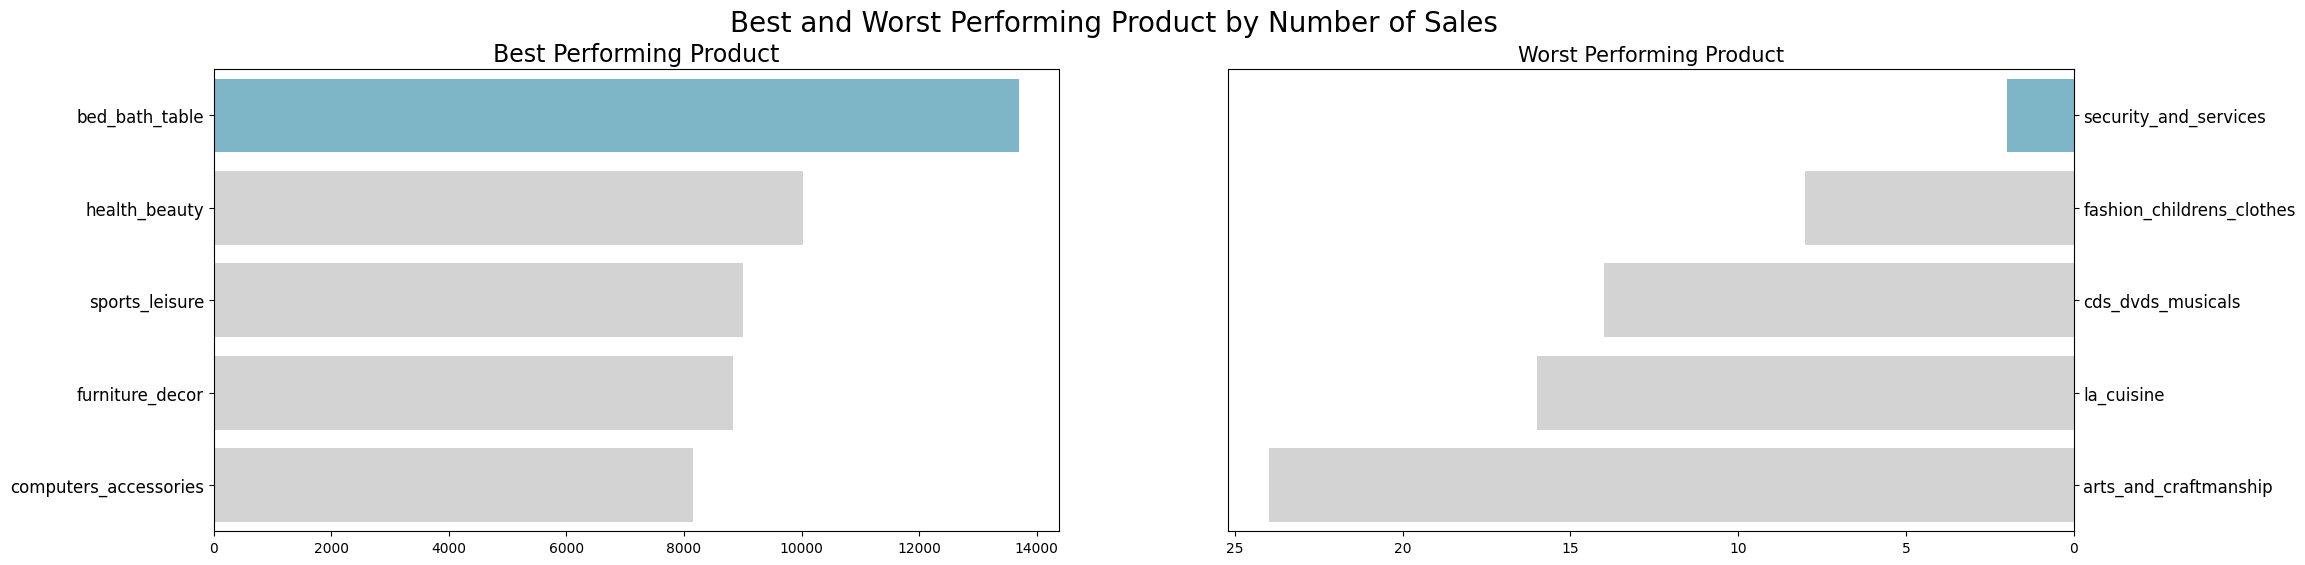

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_quantity", y="product_name", hue="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=17)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="product_quantity", y="product_name", hue="product_name", data=sum_order_items_df.sort_values(by="product_quantity", ascending=True).head(5), palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()


### Question 2: How is the sales performance in the past months throughout the years?

In [85]:
annual_orders_df = all_data_df.resample(rule='Y', on='order_approved_at').agg({
    "order_id": "nunique"  # Count unique order IDs
})
annual_orders_df.index = annual_orders_df.index.strftime('%Y')
annual_orders_df = annual_orders_df.reset_index().rename(columns={"order_id": "order_count"})
annual_orders_df

,order_approved_at,order_count
0,2016,322
1,2017,44973
2,2018,54146


In [86]:
monthly_orders_df = all_data_df.resample(rule = 'M', on = 'order_approved_at').agg({
    "order_id": "nunique"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%B')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)
monthly_orders_df


,order_approved_at,order_count
0,2016-September,1
1,2016-October,320
2,2016-November,0
3,2016-December,1
4,2017-January,760
5,2017-February,1765
6,2017-March,2689
7,2017-April,2374
8,2017-May,3693
9,2017-June,3252


In [87]:
# Filter DataFrame for the year 2016
monthly_orders_2016 = monthly_orders_df[monthly_orders_df['order_approved_at'].str.startswith('2016')]
monthly_orders_2016

,order_approved_at,order_count
0,2016-September,1
1,2016-October,320
2,2016-November,0
3,2016-December,1


In [88]:
monthly_orders_2017 = monthly_orders_df[monthly_orders_df['order_approved_at'].str.startswith('2017')]
monthly_orders_2017

,order_approved_at,order_count
4,2017-January,760
5,2017-February,1765
6,2017-March,2689
7,2017-April,2374
8,2017-May,3693
9,2017-June,3252
10,2017-July,3974
11,2017-August,4348
12,2017-September,4301
13,2017-October,4590


In [89]:
monthly_orders_2018 = monthly_orders_df[monthly_orders_df['order_approved_at'].str.startswith('2018')]
monthly_orders_2018

,order_approved_at,order_count
16,2018-January,7187
17,2018-February,6866
18,2018-March,7288
19,2018-April,6778
20,2018-May,7066
21,2018-June,6164
22,2018-July,6176
23,2018-August,6620
24,2018-September,1


In [90]:
monthly_orders_df = monthly_orders_df.sort_values(by='order_count')
monthly_orders_df = monthly_orders_df.drop_duplicates('order_approved_at', keep = 'last')

In [91]:
monthly_orders_df.head()

,order_approved_at,order_count
2,2016-November,0
0,2016-September,1
3,2016-December,1
24,2018-September,1
1,2016-October,320


In [92]:
monthly_orders_df.sort_values(by='order_count')

,order_approved_at,order_count
2,2016-November,0
0,2016-September,1
3,2016-December,1
24,2018-September,1
1,2016-October,320
4,2017-January,760
5,2017-February,1765
7,2017-April,2374
6,2017-March,2689
9,2017-June,3252


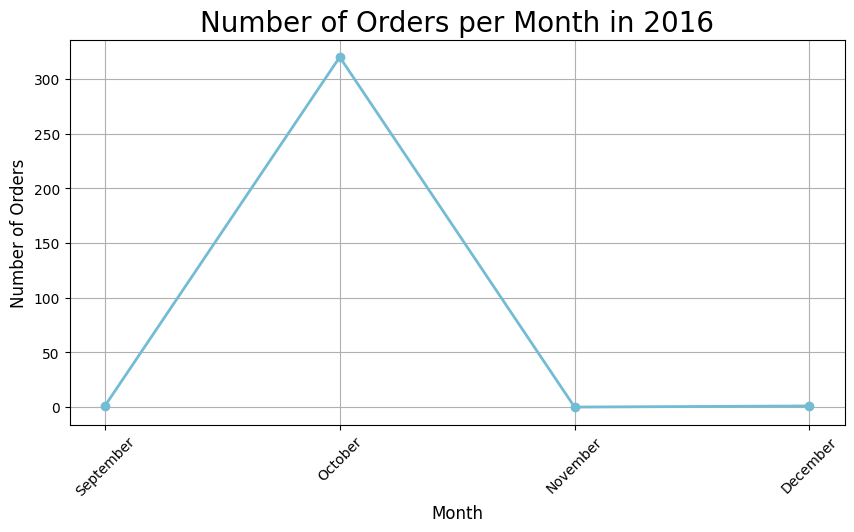

In [93]:
# Filter DataFrame for the year 2016
monthly_orders_2016 = monthly_orders_df[monthly_orders_df['order_approved_at'].str.startswith('2016')].copy()
# Convert 'order_approved_at' to datetime
monthly_orders_2016['order_approved_at'] = pd.to_datetime(monthly_orders_2016['order_approved_at'])
# Extract month names
monthly_orders_2016['order_approved_at'] = monthly_orders_2016['order_approved_at'].dt.month_name()
# Map numerical month values to month names
monthly_orders_2016['order_approved_at'] = pd.Categorical(monthly_orders_2016['order_approved_at'],
                                                          categories=list(calendar.month_name)[1:],
                                                          ordered=True)
# Sort DataFrame by month
monthly_orders_2016 = monthly_orders_2016.sort_values(by='order_approved_at')
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_2016["order_approved_at"], monthly_orders_2016["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month in 2016", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.grid(True)  # Add grid lines for better visualization
plt.show()

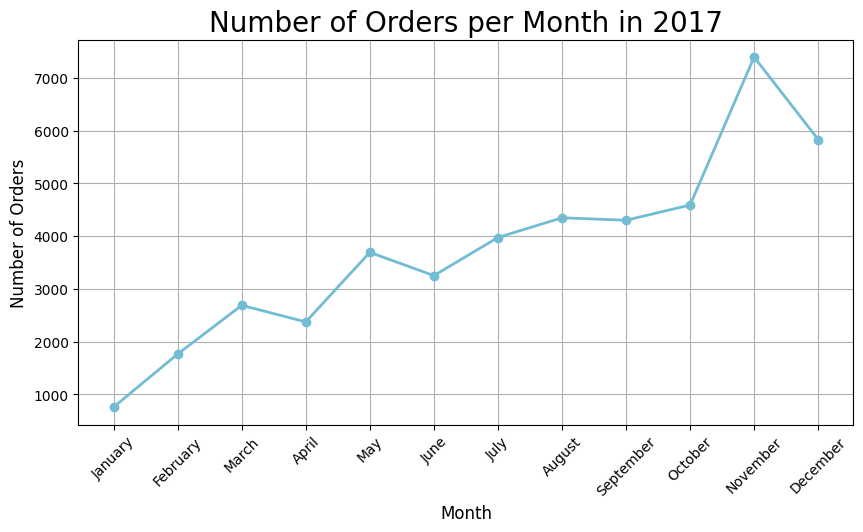

In [94]:
# Filter DataFrame for the year 2017
monthly_orders_2017 = monthly_orders_df[monthly_orders_df['order_approved_at'].str.startswith('2017')].copy()
# Convert 'order_approved_at' to datetime
monthly_orders_2017['order_approved_at'] = pd.to_datetime(monthly_orders_2017['order_approved_at'])
# Extract month names
monthly_orders_2017['order_approved_at'] = monthly_orders_2017['order_approved_at'].dt.month_name()
# Map numerical month values to month names
monthly_orders_2017['order_approved_at'] = pd.Categorical(monthly_orders_2017['order_approved_at'],
                                                          categories=list(calendar.month_name)[1:],
                                                          ordered=True)
# Sort DataFrame by month
monthly_orders_2017 = monthly_orders_2017.sort_values(by='order_approved_at')
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_2017["order_approved_at"], monthly_orders_2017["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month in 2017", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.grid(True)  # Add grid lines for better visualization
plt.show()


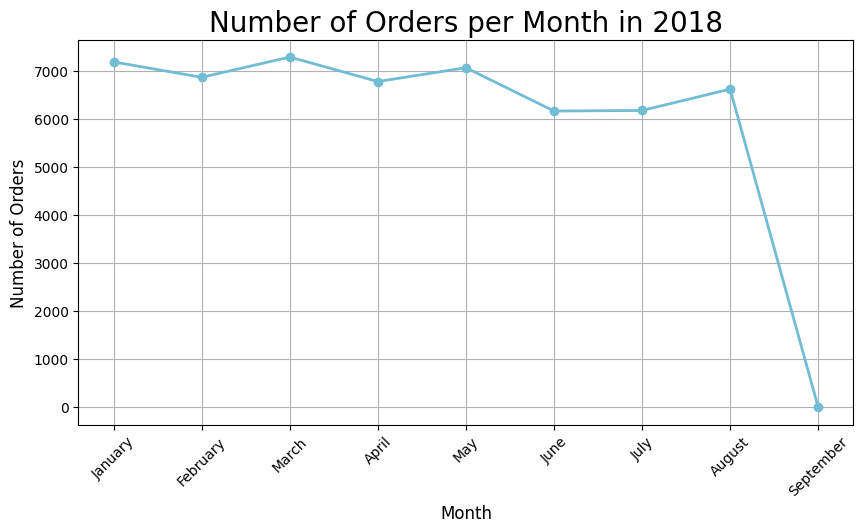

In [95]:
# Filter DataFrame for the year 2018
monthly_orders_2018 = monthly_orders_df[monthly_orders_df['order_approved_at'].str.startswith('2018')].copy()
# Convert 'order_approved_at' to datetime
monthly_orders_2018['order_approved_at'] = pd.to_datetime(monthly_orders_2018['order_approved_at'])
# Extract month names
monthly_orders_2018['order_approved_at'] = monthly_orders_2018['order_approved_at'].dt.month_name()
# Map numerical month values to month names
monthly_orders_2018['order_approved_at'] = pd.Categorical(monthly_orders_2018['order_approved_at'],
                                                          categories=list(calendar.month_name)[1:],
                                                          ordered=True)
# Sort DataFrame by month
monthly_orders_2018 = monthly_orders_2018.sort_values(by='order_approved_at')
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_2018["order_approved_at"], monthly_orders_2018["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month in 2018", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.grid(True)  # Add grid lines for better visualization
plt.show()



### Question 3: How much money do they spent from these past in months from these past years?

In [96]:
annual_spent_df = all_data_df.resample(rule='Y', on='order_approved_at').agg({
    "payment_value": "sum"  # Count unique order IDs
})
annual_spent_df.index = annual_spent_df.index.strftime('%Y')
annual_spent_df = annual_spent_df.reset_index().rename(columns={"payment_value": "total_expenditure"})
annual_spent_df

,order_approved_at,total_expenditure
0,2016,76005.16
1,2017,9311930.14
2,2018,11191728.71


In [97]:
monthly_spent_df = all_data_df.resample(rule = 'M', on = 'order_approved_at').agg({
     "payment_value": "sum"
})
monthly_spent_df.index = monthly_spent_df.index.strftime('%Y-%B')
monthly_spent_df = monthly_spent_df.reset_index()
monthly_spent_df.rename(columns={
    "payment_value": "total_expenditure"
}, inplace=True)
monthly_spent_df

,order_approved_at,total_expenditure
0,2016-September,0.00
1,2016-October,75985.54
2,2016-November,0.00
3,2016-December,19.62
4,2017-January,182178.36
5,2017-February,350023.57
6,2017-March,547228.40
7,2017-April,506593.88
8,2017-May,736346.88
9,2017-June,620191.15


In [98]:
monthly_spent_df = monthly_spent_df.sort_values(by='total_expenditure')
monthly_spent_df = monthly_spent_df.drop_duplicates('order_approved_at', keep = 'last')

In [99]:
monthly_spent_df

,order_approved_at,total_expenditure
0,2016-September,0.00
2,2016-November,0.00
3,2016-December,19.62
24,2018-September,166.46
1,2016-October,75985.54
4,2017-January,182178.36
5,2017-February,350023.57
7,2017-April,506593.88
6,2017-March,547228.40
9,2017-June,620191.15


In [100]:
monthly_spent_df.sort_values(by='total_expenditure')

,order_approved_at,total_expenditure
0,2016-September,0.00
2,2016-November,0.00
3,2016-December,19.62
24,2018-September,166.46
1,2016-October,75985.54
4,2017-January,182178.36
5,2017-February,350023.57
7,2017-April,506593.88
6,2017-March,547228.40
9,2017-June,620191.15


In [101]:
monthly_spent_2016 = monthly_spent_df[monthly_spent_df['order_approved_at'].str.startswith('2016')]
monthly_spent_2016

,order_approved_at,total_expenditure
0,2016-September,0.00
2,2016-November,0.00
3,2016-December,19.62
1,2016-October,75985.54


In [102]:
monthly_spent_2017 = monthly_spent_df[monthly_spent_df['order_approved_at'].str.startswith('2017')]
monthly_spent_2017

,order_approved_at,total_expenditure
4,2017-January,182178.36
5,2017-February,350023.57
7,2017-April,506593.88
6,2017-March,547228.40
9,2017-June,620191.15
8,2017-May,736346.88
10,2017-July,739098.77
11,2017-August,882476.79
12,2017-September,927821.13
15,2017-December,1092932.59


In [103]:
monthly_spent_2017.describe()

,total_expenditure
count,1.200000e+01
mean,7.759942e+05
std,3.828670e+05
min,1.821784e+05
25%,5.370698e+05
50%,7.377228e+05
75%,9.690990e+05
max,1.588309e+06


In [104]:
monthly_spent_2018 = monthly_spent_df[monthly_spent_df['order_approved_at'].str.startswith('2018')]
monthly_spent_2018

,order_approved_at,total_expenditure
24,2018-September,166.46
23,2018-August,1268960.54
21,2018-June,1306785.03
22,2018-July,1334156.42
17,2018-February,1352257.53
16,2018-January,1406557.66
19,2018-April,1476502.25
18,2018-March,1500474.01
20,2018-May,1545868.81


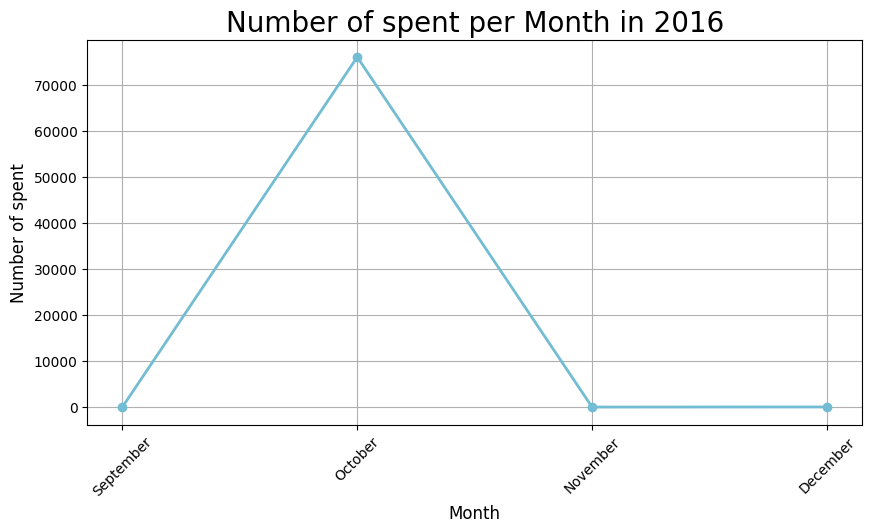

In [105]:
monthly_spent_2016 = monthly_spent_df[monthly_spent_df['order_approved_at'].str.startswith('2016')].copy()
# Convert 'order_approved_at' to datetime
monthly_spent_2016['order_approved_at'] = pd.to_datetime(monthly_spent_2016['order_approved_at'])
# Extract month names
monthly_spent_2016['order_approved_at'] = monthly_spent_2016['order_approved_at'].dt.month_name()
# Map numerical month values to month names
monthly_spent_2016['order_approved_at'] = pd.Categorical(monthly_spent_2016['order_approved_at'],
                                                          categories=list(calendar.month_name)[1:],
                                                          ordered=True)
# Sort DataFrame by month
monthly_spent_2016 = monthly_spent_2016.sort_values(by='order_approved_at')
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_spent_2016["order_approved_at"], monthly_spent_2016["total_expenditure"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of spent per Month in 2016", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of spent", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.grid(True)  # Add grid lines for better visualization
plt.show()


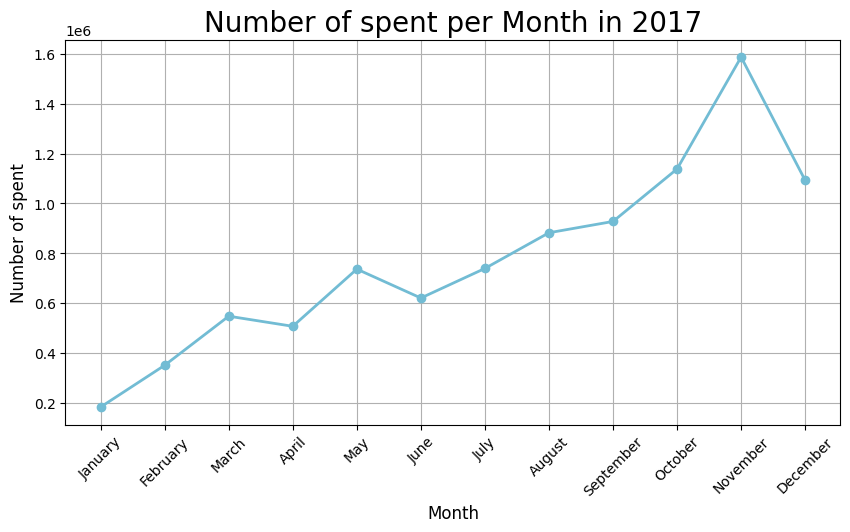

In [106]:
monthly_spent_2017 = monthly_spent_df[monthly_spent_df['order_approved_at'].str.startswith('2017')].copy()
# Convert 'order_approved_at' to datetime
monthly_spent_2017['order_approved_at'] = pd.to_datetime(monthly_spent_2017['order_approved_at'])
# Extract month names
monthly_spent_2017['order_approved_at'] = monthly_spent_2017['order_approved_at'].dt.month_name()
# Map numerical month values to month names
monthly_spent_2017['order_approved_at'] = pd.Categorical(monthly_spent_2017['order_approved_at'],
                                                          categories=list(calendar.month_name)[1:],
                                                          ordered=True)
# Sort DataFrame by month
monthly_spent_2017 = monthly_spent_2017.sort_values(by='order_approved_at')
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_spent_2017["order_approved_at"], monthly_spent_2017["total_expenditure"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of spent per Month in 2017", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of spent", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.grid(True)  # Add grid lines for better visualization
plt.show()

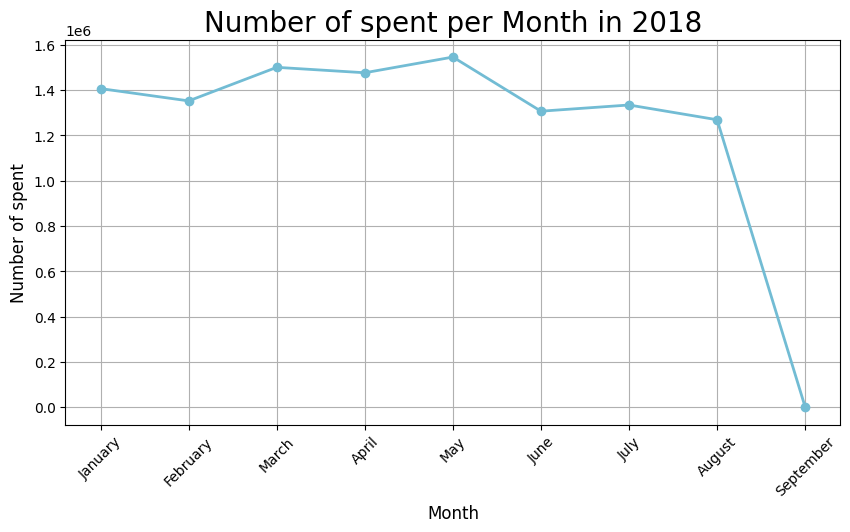

In [107]:
monthly_spent_2018 = monthly_spent_df[monthly_spent_df['order_approved_at'].str.startswith('2018')].copy()
# Convert 'order_approved_at' to datetime
monthly_spent_2018['order_approved_at'] = pd.to_datetime(monthly_spent_2018['order_approved_at'])
# Extract month names
monthly_spent_2018['order_approved_at'] = monthly_spent_2018['order_approved_at'].dt.month_name()
# Map numerical month values to month names
monthly_spent_2018['order_approved_at'] = pd.Categorical(monthly_spent_2018['order_approved_at'],
                                                          categories=list(calendar.month_name)[1:],
                                                          ordered=True)
# Sort DataFrame by month
monthly_spent_2018 = monthly_spent_2018.sort_values(by='order_approved_at')
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_spent_2018["order_approved_at"], monthly_spent_2018["total_expenditure"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of spent per Month in 2018", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of spent", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.grid(True)  # Add grid lines for better visualization
plt.show()

### Question 4: How satisfied are customers with the service of this E-commerce platform?

In [108]:
product_reviews_df = all_data_df.groupby(by="review_score").customer_id.nunique().sort_values(ascending=False).reset_index()
product_reviews_df = product_reviews_df.rename(columns={"customer_id": "number_of_customers"})
product_reviews_df

,review_score,number_of_customers
0,5.0,57076
1,4.0,19098
2,1.0,11392
3,3.0,8160
4,2.0,3148


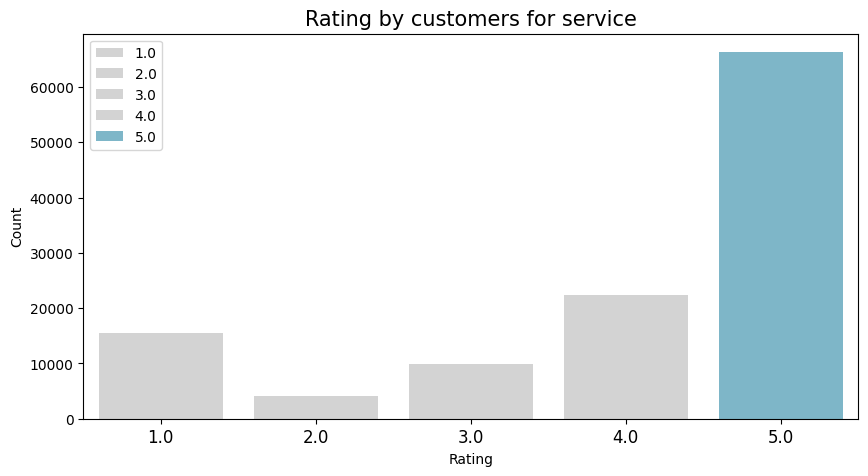

In [109]:
product_reviews_df = all_data_df['review_score'].value_counts().sort_values(ascending=True)
most_common_score = product_reviews_df.idxmax()

plt.figure(figsize=(10, 5))
sns.barplot(x=product_reviews_df.index,
            y=product_reviews_df.values,
            hue=product_reviews_df.index,  # Assigning review scores as hue
            palette=["#72BCD4" if score == most_common_score else "#D3D3D3" for score in product_reviews_df.index],
            dodge=False  # Merging bars for the same x value
            )

plt.title("Rating by customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(fontsize=12)
plt.legend(title=None)  # Remove the legend
plt.show()

### Question 5: How is the quality of the shipping service speed in our e-commerce?

In [110]:
# Menghitung durasi atau waktu pengiriman
all_data_df['purchase_duration'] = all_data_df['order_delivered_customer_date'] - all_data_df['order_purchase_timestamp']
purchase_dates_df = all_data_df[['customer_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'purchase_duration']].copy()
# Membuat salinan DataFrame shipping_dates_df
purchase_dates_df = all_data_df[['order_purchase_timestamp', 'order_delivered_customer_date', 'purchase_duration']].copy()

# Mengonversi durasi ke dalam format hari dan jam
purchase_dates_df['purchase_duration_description'] = purchase_dates_df['purchase_duration'].apply(lambda x: f"{int(x.days)} days {int(x.seconds // 3600)} hours")

# Menghapus kolom yang tidak diperlukan lagi
purchase_dates_df = purchase_dates_df.drop(columns=['purchase_duration'])

# Mengganti nama kolom
purchase_dates_df = purchase_dates_df.rename(columns={
    "order_purchase_timestamp": "customer_purchase",
    "order_delivered_customer_date": "customer_received",
    "purchase_duration_description": "purchase_durations"
})

# Menampilkan hasil
purchase_dates_df

,customer_purchase,customer_received,purchase_durations
0,2017-05-16 15:05:35,2017-05-25 10:35:35,8 days 19 hours
1,2018-01-12 20:48:24,2018-01-29 12:41:19,16 days 15 hours
2,2018-05-19 16:07:45,2018-06-14 17:58:51,26 days 1 hours
3,2018-03-13 16:06:38,2018-03-28 16:04:25,14 days 23 hours
4,2018-07-29 09:51:30,2018-08-09 20:55:48,11 days 11 hours
...,...,...,...
119138,2018-04-07 15:48:17,2018-04-13 20:06:37,6 days 4 hours
119139,2018-04-04 08:20:22,2018-04-11 18:54:45,7 days 10 hours
119140,2018-04-08 20:11:50,2018-05-09 19:03:15,30 days 22 hours
119141,2017-11-03 21:08:33,2017-11-16 19:58:39,12 days 22 hours


In [111]:
# Menghitung durasi atau waktu pengiriman
all_data_df['shipping_duration'] = all_data_df['order_delivered_customer_date'] - all_data_df['order_delivered_carrier_date']

# Membuat salinan DataFrame shipping_dates_df
shipping_dates_df = all_data_df[['order_delivered_carrier_date', 'order_delivered_customer_date', 'shipping_duration']].copy()

# Mengonversi durasi ke dalam format hari dan jam
shipping_dates_df['shipping_duration_description'] = shipping_dates_df['shipping_duration'].apply(lambda x: f"{int(x.days)} days {int(x.seconds // 3600)} hours")

# Menghapus kolom yang tidak diperlukan lagi
shipping_dates_df = shipping_dates_df.drop(columns=['shipping_duration'])

# Mengganti nama kolom
shipping_dates_df = shipping_dates_df.rename(columns={
    "order_delivered_carrier_date": "carrier_pickup",
    "order_delivered_customer_date": "customer_received",
    "shipping_duration_description": "shipping_durations"
})

# Menampilkan hasil
shipping_dates_df


,carrier_pickup,customer_received,shipping_durations
0,2017-05-23 10:47:57,2017-05-25 10:35:35,1 days 23 hours
1,2018-01-15 17:14:59,2018-01-29 12:41:19,13 days 19 hours
2,2018-06-11 14:31:00,2018-06-14 17:58:51,3 days 3 hours
3,2018-03-27 23:22:42,2018-03-28 16:04:25,0 days 16 hours
4,2018-07-30 15:16:00,2018-08-09 20:55:48,10 days 5 hours
...,...,...,...
119138,2018-04-11 02:08:36,2018-04-13 20:06:37,2 days 17 hours
119139,2018-04-05 18:42:35,2018-04-11 18:54:45,6 days 0 hours
119140,2018-04-09 17:52:17,2018-05-09 19:03:15,30 days 1 hours
119141,2017-11-06 18:24:41,2017-11-16 19:58:39,10 days 1 hours


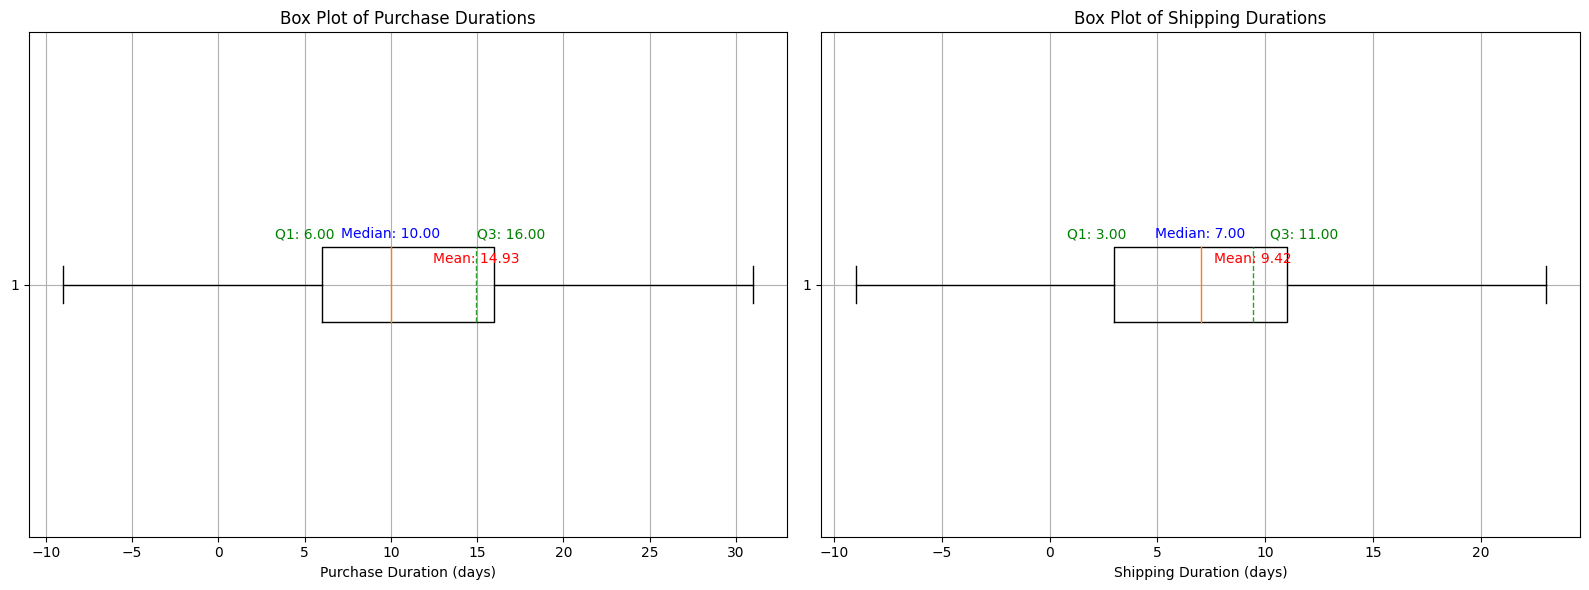

In [112]:
# Convert purchase durations to numerical values (in days)
purchase_durations_numeric = purchase_dates_df['purchase_durations'].str.split(' ').str[0].astype(int)

# Convert shipping durations to numerical values (in days)
shipping_durations_numeric = shipping_dates_df['shipping_durations'].str.split(' ').str[0].astype(int)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot for purchase durations
axes[0].boxplot(purchase_durations_numeric, vert=False, showmeans=True, showfliers=False, meanline=True)
axes[0].set_title('Box Plot of Purchase Durations')
axes[0].set_xlabel('Purchase Duration (days)')

# Display mean, median, and IQR values for purchase durations
mean_val_purchase = np.mean(purchase_durations_numeric)
median_val_purchase = np.median(purchase_durations_numeric)
q1_purchase, q3_purchase = np.percentile(purchase_durations_numeric, [25, 75])
iqr_val_purchase = q3_purchase - q1_purchase
axes[0].text(mean_val_purchase, 1.05, f'Mean: {mean_val_purchase:.2f}', va='center', ha='center', color='red')
axes[0].text(median_val_purchase, 1.1, f'Median: {median_val_purchase:.2f}', va='center', ha='center', color='blue')
axes[0].text(q1_purchase - 0.1 * iqr_val_purchase, 1.1, f'Q1: {q1_purchase:.2f}', va='center', ha='center', color='green')
axes[0].text(q3_purchase + 0.1 * iqr_val_purchase, 1.1, f'Q3: {q3_purchase:.2f}', va='center', ha='center', color='green')
axes[0].grid(True)

# Box plot for shipping durations
axes[1].boxplot(shipping_durations_numeric, vert=False, showmeans=True, showfliers=False, meanline=True)
axes[1].set_title('Box Plot of Shipping Durations')
axes[1].set_xlabel('Shipping Duration (days)')

# Display mean, median, and IQR values for shipping durations
mean_val_shipping = np.mean(shipping_durations_numeric)
median_val_shipping = np.median(shipping_durations_numeric)
q1_shipping, q3_shipping = np.percentile(shipping_durations_numeric, [25, 75])
iqr_val_shipping = q3_shipping - q1_shipping
axes[1].text(mean_val_shipping, 1.05, f'Mean: {mean_val_shipping:.2f}', va='center', ha='center', color='red')
axes[1].text(median_val_shipping, 1.1, f'Median: {median_val_shipping:.2f}', va='center', ha='center', color='blue')
axes[1].text(q1_shipping - 0.1 * iqr_val_shipping, 1.1, f'Q1: {q1_shipping:.2f}', va='center', ha='center', color='green')
axes[1].text(q3_shipping + 0.1 * iqr_val_shipping, 1.1, f'Q3: {q3_shipping:.2f}', va='center', ha='center', color='green')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Question 6: How would you describe the demographic characteristics of our customers, and is there any variation in purchasing preferences among them?



*  Demographics based on customer's state



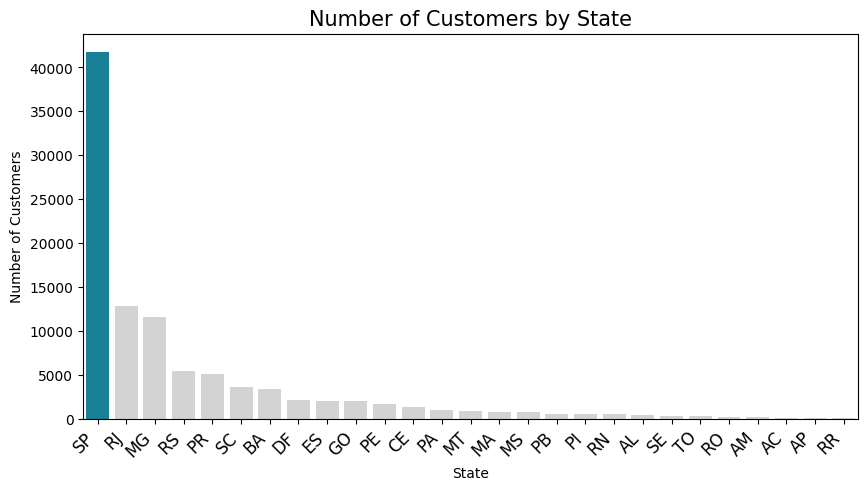

In [113]:
bystate_df = all_data_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={"customer_id": "customer_count"}, inplace=True)

plt.figure(figsize=(10, 5))

# Sorting the data by customer_count in descending order to get the highest count first
sorted_bystate_df = bystate_df.sort_values(by="customer_count", ascending=False)

# Creating a color palette with one color for the highest count and the rest with a default color
colors = ["#068DA9" if state == sorted_bystate_df.iloc[0]['customer_state'] else "#D3D3D3" for state in sorted_bystate_df['customer_state']]

sns.barplot(
    x="customer_state",
    y="customer_count",
    hue="customer_state",  # Using 'customer_state' as hue
    data=sorted_bystate_df,
    palette=colors,
    legend=False  # Hide the legend since there's only one color
)

plt.title("Number of Customers by State", fontsize=15)
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tick_params(axis='x', labelsize=12)
plt.show()


It is proved that there are larger numbers of customers from state of SP



*   Demographics based on the distribution throughout the customer's city:




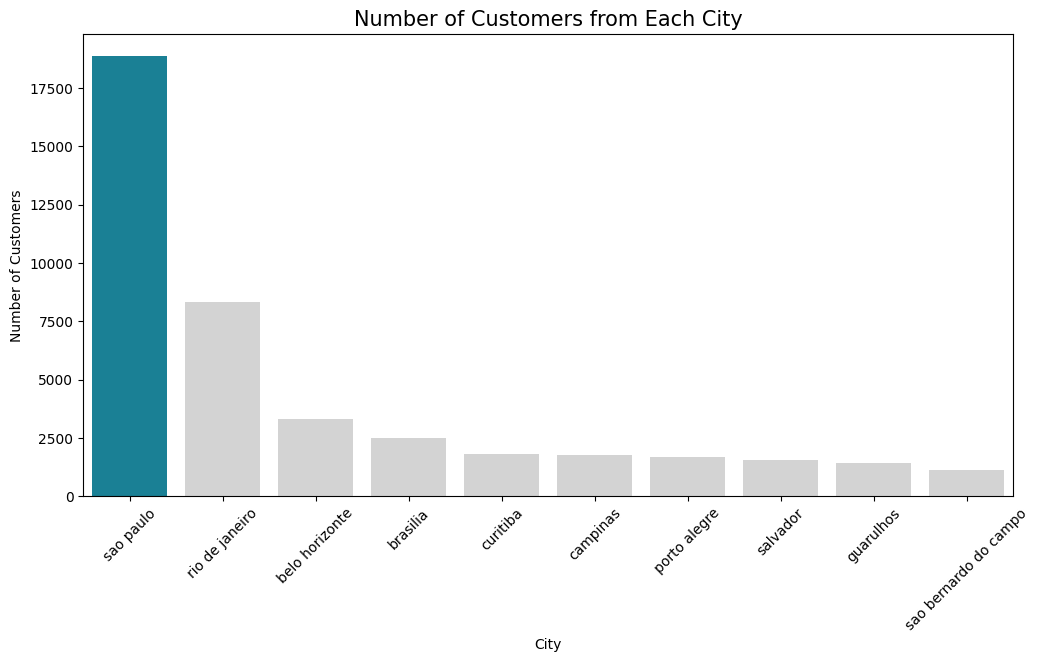

In [114]:
bycity_df = all_data_df['customer_city'].value_counts().head(10)

plt.figure(figsize=(12, 6))

most_common_city = bycity_df.idxmax()

bycity_df = bycity_df.sort_values(ascending=False)

sns.barplot(x=bycity_df.index,
            y=bycity_df.values,
            hue=bycity_df.index,  # Menggunakan data yang sama sebagai nilai hue
            palette=["#068DA9" if city == most_common_city else "#D3D3D3" for city in bycity_df.index],
            legend=False  # Menghilangkan legenda karena hanya ada satu warna
            )

plt.title("Number of Customers from Each City", fontsize=15)
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, fontsize=10)
plt.show()


It is proved that there are larger numbers of customers from city of Sao Paulo



*   By Order Status Distribution



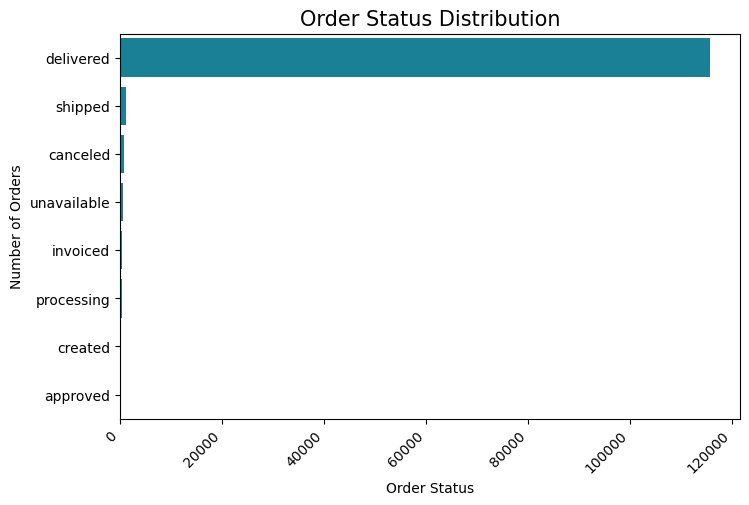

In [115]:
order_status_counts = all_data_df['order_status'].value_counts()

plt.figure(figsize=(8, 5))

most_common_status = order_status_counts.idxmax()

sns.barplot(x=order_status_counts.values,
            y=order_status_counts.index,
            order=order_status_counts.index,  # Specify the order of the bars based on their frequency
            color='#068DA9'
            )

plt.title("Order Status Distribution", fontsize=15)
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()


It is proved that larger numbers of orders have been delivered

### RFM Analysis



*   Recency: Parameter used to determine when a customer last made a transaction.
*   Frequency: This parameter is used to identify how often a customer makes transactions.
*   Monetary: This last parameter is used to identify how much revenue comes from that customer.



Calculate and display the Recency, Frequency, and Monetary:

In [116]:
rfm_df = all_data_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp":"max",
    "order_id": "nunique",
    "payment_value": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
1,000161a058600d5901f007fab4c27140,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,1,107.01,198
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,1,81.36,202
99437,fffeda5b6d849fbd39689bb92087f431,1,63.13,148
99438,ffff42319e9b2d713724ae527742af25,1,214.13,126
99439,ffffa3172527f765de70084a7e53aae8,1,91.00,410


Plotting RFM Analysis

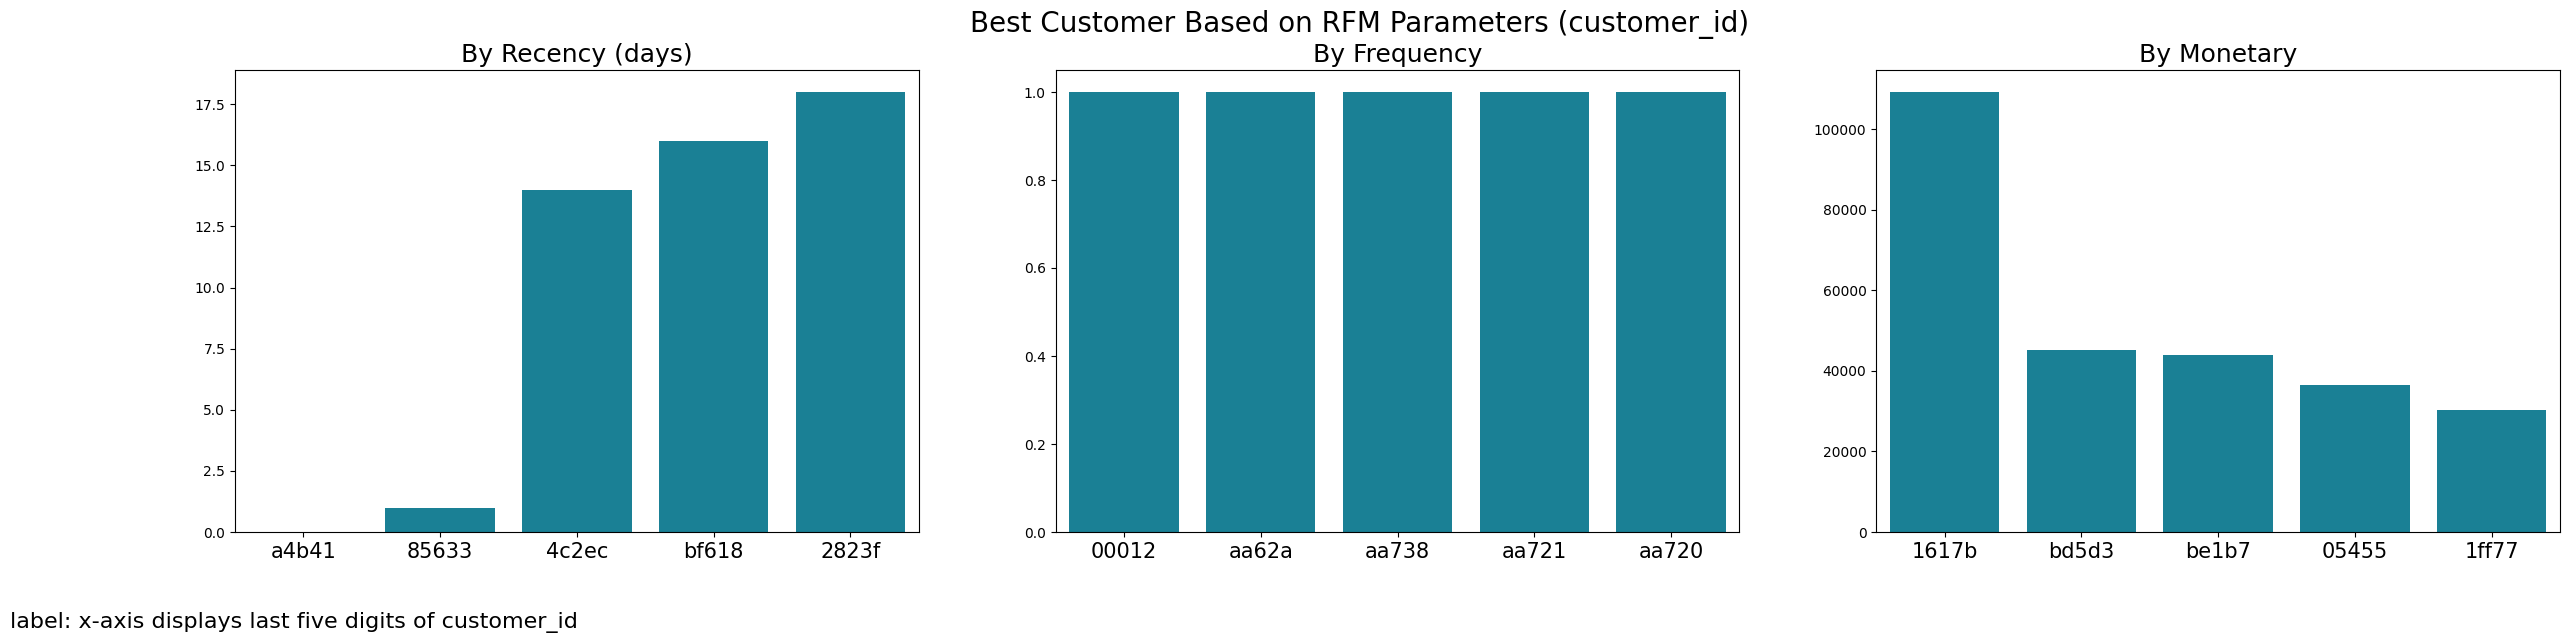

In [117]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))


color = "#068DA9" # Define the color


sns.barplot(x="customer_id", y="recency", data=rfm_df.sort_values(by="recency", ascending=True).head(5), color=color, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)
labels = [label.get_text()[:5] for label in ax[0].get_xticklabels()] # Format x-axis labels to display only the first five digits
ax[0].set_xticks(range(len(labels)))
ax[0].set_xticklabels(labels)

sns.barplot(x="customer_id", y="frequency", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), color=color, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
labels = [label.get_text()[:5] for label in ax[1].get_xticklabels()]
ax[1].set_xticks(range(len(labels)))
ax[1].set_xticklabels(labels)

sns.barplot(x="customer_id", y="monetary", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), color=color, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
labels = [label.get_text()[:5] for label in ax[2].get_xticklabels()]
ax[2].set_xticks(range(len(labels)))
ax[2].set_xticklabels(labels)

fig.text(0.05, -0.05, 'label: x-axis displays last five digits of customer_id', ha='left', fontsize=16) # Add the short information below the graphs

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()


## Conclusion

- Question 1: Which products are sold the most and the least?
- Question 2: How is the sales performance in the past months throughout the years?
- Question 3: How much money do they spent from these past in months from these past years?
- Question 4: How satisfied are customers with the service of this E-commerce platform?
- Question 5: How is the quality of the shipping service speed in our e-commerce?
- Question 6: How would you describe the demographic characteristics of our customers, and is there any variation in purchasing preferences among them?

- Answer 1: Based on the visualization results that have been displayed, customers tend to purchase bed_bath_table products more frequently, while the least purchased product is security_and_services.
- Answer 2: Based on the 2016 data, it is clearly evident that the sales performance done by customers was relatively low. On the other hand, in 2017, the numbers of customers peak up to 7000 and it showed an increase throughout the months. However, the 2018' sales performance statistics witnessed a huge drop from January to September.
- Answer 3: In 2016, the greatest expenditure was 70000$ and the rate of the data was not quite significant since it had only inadequate amount of data. However, in 2017, the number of spent presented such an increase from January - November, then it fell in December. In 2018, the data followed by huge decrease throughout the months.
- Answer 4:
Customer satisfaction with the provided services is very high because the visualization displayed shows that customers who give a rating of 5 are very numerous, and the second most numerous are those who give a rating of 4.
- Answer 5: There were two parameters used in this explanatory data; purchased_durations = customer_purchased (the time when customer purchased the products) vs shipping_durations = customer_received and career_pickup (the time when career pick up the packages) vs customer_received. The average of shipping durations between the career pick up packaging time and arrival to customer's home was 9.42 days, while the average for between the purchased products and the arrival of the products was 14.43 days.
- Answer 6: Both of the state and the city with the most customers is SP, which means the city with the most customers is Sao Paulo, and the second place is RJ (Rio de Janeiro), and the status of the most order items is delivered.




RFM Analysis Conclusion


*   Recency: It is evident that this e-commerce app was mostly open for 17.5 days by the customer_id: *2823f and the second rate goes to customer *bf618 by opening this app for 15 days.
*   Frequency: It proves that most of the customers open that app for only once.
*   Monetery: The highest expenditure who had done by customers was around 2000 - 100000

